Search for any field in JSON object

In [5]:
def get_field_values(json_obj, field_name):
    """
    Returns a list of all values of the specified field in the JSON object
    with any level of nesting.
    """
    result = []
    if isinstance(json_obj, dict):
        for key, value in json_obj.items():
            if key == field_name:
                result.append(value)
            else:
                result.extend(get_field_values(value, field_name))
    elif isinstance(json_obj, list):
        for item in json_obj:
            result.extend(get_field_values(item, field_name))
    return result

Get all matches with 10 players, playerIDs and wins

In [39]:
with open('lolMatch.json', encoding="utf-8") as f:
    data = json.load(f)

for i in range(1, len(data)):
    participants = get_field_values(data[i], 'participants')
    if len(participants[0]) != 10:
        continue
    print('\nMatch ', i)
    for player in participants[1]:
        print(get_field_values(player, 'puuid')[0], '\t', get_field_values(player, 'win')[0])


Match  2
eSENkVd2RZz7UPvDJV4DUGdEesrck79UoqufrU_zbnvzzUh1D6hzhYg9H5XahfUovcKnYhQ-wrRy8Q 	 False
tjn0xgZp-NXT7nnqUkUyFij-WpkuyW0C48R-BueCtsJ96yAlh4h8stN1mC3rOQb5L8GF47huLOX64w 	 False
cWegWX9cAlTTu89tJqlAVTx6UBaXwFvtlZ_vfec9BVCyxwA6uXJI4GW1kS4JXoQU9DX-Y6HQoPhqog 	 False
4UXXNNnYVIw7-Yy1fUDX4g-HcXCWbg9seluDuuvZYyOjh5ZE81XD96g7RsbKzOnssCWJbKHvAtgBlw 	 False
COFiGhpicYc5NBOQqt76w4byLgqIBo3IbpalTnl7fyaPTCGux2TC8Ok15zJFup77ybnZxiit0-6u3w 	 False
QcIZ2usWJLU8aFRJlAnAAs1u_bJqH1y4n33ginfbXBth0a-BEkHiWM0bQZEUXDIlQ_Dr7qS-nZTHuQ 	 True
uhoRD9wVERCYrNOKt8ESO2MwBolXG6rE-KnSUZ-P4KghB4BVzVPqx-9vWHp5E3JAvgGFhSb8j_bdOA 	 True
MbZ9klxdQexHcZZR1GuHR9rP_NSk3mO3IFAK8J-yNxlqqYufuCApM7ZJmhQosxIb3zWX8hd51oqkzQ 	 True
ksFzTlzLAly1O_Q47PKihoNvTgn78N8Bu8WESpWFLL2eFXuR5p2DShHn7xjUwMETUVQbxFxQMUDdjQ 	 True
Ko8g9tKO5rgBWp5aaaArGsheg68R5xHZNAXF2CWBV6O5ghQf257rtNVnWAK91G6nq24YjQDyXo77Mg 	 True

Match  3
ZXp5DyZ9XXERNemiEDd0UVN_yZAxr3szs82ayCy5Tffl6V6w98H2h1HC03R2Wh5Mjapb_ql2eH2L4g 	 False
BGl39Lkt-IkrSjhdkEhGRClIAOCk

jHAcnv1NtP0znSI0R1KGZUsCJrvw80hJQr3hPIymJx4c0hQzamJscobtbv9QNQ4k6vCg-7xmw04a0w 	 True
xcly60XGDfxJDvKSx2P4Zsz-JsO3wwmxMqJLoHTYotV_q5OOlJBkbLLB0dzf1y0rVXwQOcKpVbzlWQ 	 True
jvugniT7NuqHLnbSW9Hw6jJYO5s6XI73fuqHqW8iDrU2miS7vfootFo3Di81h2jUGQCofOLiGkuBZg 	 True
SuNv-qj6Oohf3aEWb5C3gnubMumyWt91hbq7QQXgVjQUHsHo7bkxomUVYTHC6fe84UKyBjvaFfxm7w 	 True
X2fRsIuf8JUKloBOw-XqliY9fg_4TIK_1jDxc-ngMYU1_82-MuIZtRaR6l7WjTjFV3uF16D8kTNDRA 	 True
Ig1oa5CeRQe7pa8vxqpQ0hRqEU1F0sFvysVK2eYXlnSWAd1DQu80PW6NEo5R0uKe9xqiT8cLADOVBw 	 False
27VeJ8m1Wx2Eyi5XSAMTqJCVynH2CytONtmnqoGoxnqxjJCl63cU9uB-peXiOQQDU0FbmMFGGi0tjg 	 False
MrXTVLvfYgW5pdeOUZQtZqV_lOol_wH33mUGW2f3zrPluc6AZSFAiQ1HLqzeZiIDKdZUObCeQosNhw 	 False
fUTtQOujdTaO0teH6zvW520_lwduKnvCgRUg-WPAl9fD_MJjxO_jEftgzqdSmX06R2JGHlReeSbBLg 	 False
8BFpza_XjYYWZfRjK1Q4ZxEN0gEcQpYnKGFopOSbXpvw7IJWJYJ4dI10xbTYOvTXI_UPxs3sIagGhw 	 False

Match  531
fWrKiLWW3XmCipY_twBthyEqgWaFuxlNVz9YLtAF6lOccLWB6_Xvr5nqcpgcSTJz8iXdOZd0vxo9FA 	 False
VXG0G_Gu9_lt_kz2FbYU5PvjF1Djf70-PN5n

This part scrapes the data into a df and provides intital ELO

In [147]:
import pandas as pd
playersdf = pd.DataFrame({'id': [], 'ELO': [], 'matches_played': [], 'wins': [], 'losses': []})

In [82]:
import pandas as pd
playersdf = pd.DataFrame({'id': [], 'ELO': [], 'matches_played': [], 'wins': [], 'losses': []})

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

with open('lolMatch.json', encoding="utf-8") as f:
    data = json.load(f)

all_players = []
matchcount = 0

for i in range(1, len(data)):
    participants = get_field_values(data[i], 'participants')
    if len(participants[0]) != 10:
        continue
    matchcount += 1
    for player in participants[1]:
        pid = get_field_values(player, 'puuid')[0]
        win = 1 if get_field_values(player, 'win')[0] else 0
        loss = 0 if get_field_values(player, 'win')[0] else 1
        
        new_player = {'id': pid, 'ELO': 1000, 'matches_played': 1, 'wins': win, 'losses': loss}

        # check if the player is already in the DataFrame
        if pid in playersdf['id'].tolist():
            # increment the number of matches played for the existing player
            playersdf.loc[playersdf['id'] == new_player['id'], 'matches_played'] += new_player['matches_played']
            playersdf.loc[playersdf['id'] == new_player['id'], 'wins'] += new_player['wins']
            playersdf.loc[playersdf['id'] == new_player['id'], 'losses'] += new_player['losses']
        else:
            # add the new player to the DataFrame
            playersdf = playersdf.append(new_player, ignore_index=True)
            
        
        
playersdf

,id,ELO,matches_played,wins,losses
0,eSENkVd2RZz7UPvDJV4DUGdEesrck79UoqufrU_zbnvzzU...,1000.0,1.0,0.0,1.0
1,tjn0xgZp-NXT7nnqUkUyFij-WpkuyW0C48R-BueCtsJ96y...,1000.0,1.0,0.0,1.0
2,cWegWX9cAlTTu89tJqlAVTx6UBaXwFvtlZ_vfec9BVCyxw...,1000.0,1.0,0.0,1.0
3,4UXXNNnYVIw7-Yy1fUDX4g-HcXCWbg9seluDuuvZYyOjh5...,1000.0,1.0,0.0,1.0
4,COFiGhpicYc5NBOQqt76w4byLgqIBo3IbpalTnl7fyaPTC...,1000.0,1.0,0.0,1.0
...,...,...,...,...,...
384,7nciBasYULX3ZfR7zONSSmDjhqj9F1g3Br1ElxKpFJZIwq...,1000.0,5.0,2.0,3.0
385,K7PZGV21WiS6YNYe6nXZ498ZiS9jKeun-C3J7X1npMbtpK...,1000.0,10.0,8.0,2.0
386,NzuXdkdnH86tpmVYluykXL4ywJ2QF-aT6EV4t_MhTSLcWF...,1000.0,10.0,8.0,2.0
387,5NdpwQH95lFFDULCBDI81zLbIOOE8V2iZHRJ0yE94vEWDF...,1000.0,8.0,5.0,3.0


In [86]:
len(playersdf[playersdf['matches_played'] >= 10])

60

In [44]:
playersdf.head()

,id
0,oeXFKjBngfYW0f1y72O0TBVWnpqFb0TctO4PIvH2CiYPcp...
1,KltXIMerHIcavmCNAZwAVJf7p5gDvYbb0aEp1-XH82pwHx...
2,onqT2ilQpmtFBTuRuOymK0tl0kb8IJTq4SjpG5zYKlbRCg...
3,cWegWX9cAlTTu89tJqlAVTx6UBaXwFvtlZ_vfec9BVCyxw...
4,LUNPPa97buIt7-VVrZ1cZP3ntd90J5c5Zu8MkLl6FTd2v7...


In [115]:
def expected_result(this, opponent):
    return 1 / (1 + 10 ** ((opponent - this) / 400))

In [134]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

with open('lolMatch.json', encoding="utf-8") as f:
    data = json.load(f)

all_players = []
matchcount = 0

for i in range(1, len(data)):
    participants = get_field_values(data[i], 'participants')
    if len(participants[0]) != 10:
        continue
    matchcount += 1
    for player in participants[1]:
        pid = get_field_values(player, 'puuid')[0]
        win = 1 if get_field_values(player, 'win')[0] else 0
        loss = 0 if get_field_values(player, 'win')[0] else 1
        
        new_player = {'id': pid, 'ELO': 1000, 'matches_played': 1, 'wins': win, 'losses': loss}

        # check if the player is already in the DataFrame
        if pid in playersdf['id'].tolist():
            # increment the number of matches played for the existing player
            playersdf.loc[playersdf['id'] == new_player['id'], 'matches_played'] += new_player['matches_played']
            playersdf.loc[playersdf['id'] == new_player['id'], 'wins'] += new_player['wins']
            playersdf.loc[playersdf['id'] == new_player['id'], 'losses'] += new_player['losses']
        else:
            # add the new player to the DataFrame
            playersdf = playersdf.append(new_player, ignore_index=True)
        
    winners = get_field_values(participants, 'win')
    if not any(winners):
        #TODO draw needs to be handled
        continue
    
    winnerteam = []
    loserteam = []
    winnerELO = 0.0
    loserELO = 0.0
    for n, w in enumerate(winners):
        if w:
            winnerteam.append(participants[0][n])
            winnerELO += playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'].values[0] / 5
        else:
            loserteam.append(participants[0][n])
            loserELO += playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'].values[0] / 5
    
    k = 100.0
    expected_winner = expected_result(winnerELO, loserELO)
    delta_winnerELO = k * (1 - expected_winner)
    expected_loser = expected_result(loserELO, winnerELO)
    delta_loserELO = k * (0 - expected_loser)
    print(i, ' Delta_WinnerELO: ', delta_winnerELO, ' delta_loserELO: ', delta_loserELO)
    print(i, ' WinnerELO: ', winnerELO, ' loserELO: ', loserELO, '\n')
    
    for n, w in enumerate(winners):
        if w:
            playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'] += delta_winnerELO
        else:
            playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'] += delta_loserELO
        

        
playersdf

2  Delta_WinnerELO:  17.368409717416533  delta_loserELO:  -17.368409717416526
2  WinnerELO:  952.534908351213  loserELO:  681.5804861343537 

3  Delta_WinnerELO:  18.2487525894668  delta_loserELO:  -18.248752589466793
3  WinnerELO:  972.9618188973259  loserELO:  712.457336932643 

4  Delta_WinnerELO:  24.777838510409744  delta_loserELO:  -24.77783851040975
4  WinnerELO:  1457.8072218019377  loserELO:  1264.8942656007164 

5  Delta_WinnerELO:  19.848953491396237  delta_loserELO:  -19.84895349139623
5  WinnerELO:  1482.5850603123474  loserELO:  1240.1164270903064 

76  Delta_WinnerELO:  26.68352763305376  delta_loserELO:  -26.683527633053757
76  WinnerELO:  1502.4340138037435  loserELO:  1326.8506871127267 

78  Delta_WinnerELO:  6.821424589264902  delta_loserELO:  -6.821424589264913
78  WinnerELO:  1300.167159479673  loserELO:  845.9907659027838 

96  Delta_WinnerELO:  19.135774428008943  delta_loserELO:  -19.13577442800895
96  WinnerELO:  1220.2674735989103  loserELO:  969.903318068629

460  Delta_WinnerELO:  2.4251531252930225  delta_loserELO:  -2.425153125293029
460  WinnerELO:  1280.4348945050308  loserELO:  638.5954092843762 

461  Delta_WinnerELO:  13.61951927312538  delta_loserELO:  -13.619519273125391
461  WinnerELO:  1282.860047630324  loserELO:  961.958512402844 

462  Delta_WinnerELO:  18.722968665276095  delta_loserELO:  -18.722968665276092
462  WinnerELO:  1551.5168157197852  loserELO:  1296.4795669034493 

463  Delta_WinnerELO:  50.1237877298899  delta_loserELO:  -50.12378772988989
463  WinnerELO:  1570.2397843850613  loserELO:  1571.099951390785 

469  Delta_WinnerELO:  22.017845886967947  delta_loserELO:  -22.017845886967947
469  WinnerELO:  832.6566570139868  loserELO:  612.9684970020342 

470  Delta_WinnerELO:  19.51023420712402  delta_loserELO:  -19.51023420712403
470  WinnerELO:  910.955000040994  loserELO:  664.7637276979017 

471  Delta_WinnerELO:  5.225532765373919  delta_loserELO:  -5.225532765373908
471  WinnerELO:  1024.8496851244884  loserELO

530  Delta_WinnerELO:  10.443923490625263  delta_loserELO:  -10.443923490625256
530  WinnerELO:  1214.0194089931877  loserELO:  840.7268581708595 

531  Delta_WinnerELO:  21.90181479712048  delta_loserELO:  -21.90181479712048
531  WinnerELO:  830.2829346802343  loserELO:  609.4185987184352 

532  Delta_WinnerELO:  0.6584623350502472  delta_loserELO:  -0.658462335050248
532  WinnerELO:  1374.8872259152047  loserELO:  503.44724983470854 

533  Delta_WinnerELO:  15.073719808096941  delta_loserELO:  -15.073719808096941
533  WinnerELO:  1764.013615455532  loserELO:  1463.6849498896077 

534  Delta_WinnerELO:  0.2966235702429709  delta_loserELO:  -0.2966235702429593
534  WinnerELO:  1862.7864326569677  loserELO:  852.1847494773547 

535  Delta_WinnerELO:  1.1071199493062345  delta_loserELO:  -1.1071199493062402
535  WinnerELO:  1786.0958490199555  loserELO:  1005.7077095917197 

536  Delta_WinnerELO:  1.6797915950059417  delta_loserELO:  -1.679791595005935
536  WinnerELO:  1931.4182870988584

596  Delta_WinnerELO:  21.25997084821315  delta_loserELO:  -21.25997084821315
596  WinnerELO:  1815.3147157509356  loserELO:  1587.8615531262958 

597  Delta_WinnerELO:  61.734036588419784  delta_loserELO:  -61.73403658841977
597  WinnerELO:  1753.4898773639923  loserELO:  1836.5746865991491 

598  Delta_WinnerELO:  87.89781028676651  delta_loserELO:  -87.89781028676651
598  WinnerELO:  1774.8406500107294  loserELO:  2119.286289780505 

599  Delta_WinnerELO:  27.471558460762115  delta_loserELO:  -27.471558460762108
599  WinnerELO:  2031.3884794937385  loserELO:  1862.738460297496 

600  Delta_WinnerELO:  68.45110314093097  delta_loserELO:  -68.45110314093097
600  WinnerELO:  1838.8131206066737  loserELO:  1973.3716299001408 

601  Delta_WinnerELO:  50.33727999334494  delta_loserELO:  -50.33727999334494
601  WinnerELO:  1904.9205267592097  loserELO:  1907.2642237476048 

602  Delta_WinnerELO:  36.21515493101255  delta_loserELO:  -36.21515493101255
602  WinnerELO:  1955.2578067525542  lo

,id,ELO,matches_played,wins,losses
0,eSENkVd2RZz7UPvDJV4DUGdEesrck79UoqufrU_zbnvzzU...,664.212076,11.0,0.0,11.0
1,tjn0xgZp-NXT7nnqUkUyFij-WpkuyW0C48R-BueCtsJ96y...,664.212076,11.0,0.0,11.0
2,cWegWX9cAlTTu89tJqlAVTx6UBaXwFvtlZ_vfec9BVCyxw...,664.212076,11.0,0.0,11.0
3,4UXXNNnYVIw7-Yy1fUDX4g-HcXCWbg9seluDuuvZYyOjh5...,664.212076,11.0,0.0,11.0
4,COFiGhpicYc5NBOQqt76w4byLgqIBo3IbpalTnl7fyaPTC...,664.212076,11.0,0.0,11.0
...,...,...,...,...,...
384,7nciBasYULX3ZfR7zONSSmDjhqj9F1g3Br1ElxKpFJZIwq...,740.394183,55.0,22.0,33.0
385,K7PZGV21WiS6YNYe6nXZ498ZiS9jKeun-C3J7X1npMbtpK...,1525.132809,110.0,88.0,22.0
386,NzuXdkdnH86tpmVYluykXL4ywJ2QF-aT6EV4t_MhTSLcWF...,1525.132809,110.0,88.0,22.0
387,5NdpwQH95lFFDULCBDI81zLbIOOE8V2iZHRJ0yE94vEWDF...,1719.321857,88.0,55.0,33.0


In [102]:
get_field_values(data[496], 'win')

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [135]:
playersdf.sort_values(by='ELO')

,id,ELO,matches_played,wins,losses
375,g0IWay8Y3U3gdKHL4QOozI2gJqBo_1NPZO136yD38q5p0m...,249.422098,33.0,0.0,33.0
256,ATYX_mWzfrnUIVGRZRNt-ATIqHdBT4SaE73JmVe5aoz7O5...,297.899997,33.0,0.0,33.0
260,o3lHdMk4BwXbSGGAhFeEM3sWsBijur3RtxJX7O9UjVkdnG...,297.899997,33.0,0.0,33.0
258,rMUxEVCIdfAU3nyOQMZd4yq1Bv5N75J5zYiw3kHJSK7l_j...,297.899997,33.0,0.0,33.0
228,IsdNxUdAx5oWrH5t0pVGJ1lvcYrUNVvZua6zdbgZ6T8vcB...,387.728507,88.0,11.0,77.0
...,...,...,...,...,...
344,cDvo69U6qI8b36ubdiY-GG5vpldCRN9Bl1w80R2ZhI-zwK...,2219.096999,297.0,198.0,99.0
343,fHPcSeiJUy10UNrm8TeVz12WYDnPglMp8UktkKk_CNMuH5...,2239.458887,253.0,176.0,77.0
348,KqfCpIZhuxWgJChuWtCmfyvvmbaFoNSuh-QIaJp2nB4y2L...,2267.987192,341.0,286.0,55.0
349,-g01zxvJZzpuVQEW102Dqozy3lsH3D1o4YVLIamuagfiIZ...,2267.987192,341.0,286.0,55.0


In [139]:
playersdf.loc[208, 'ELO']

2567.0201897795614

Seeing how the ranking changes over many played rounds

In [148]:
plotdata = []


with open('lolMatch.json', encoding="utf-8") as f:
    data = json.load(f)

for p in range(20):
    all_players = []

    for i in range(1, len(data)):
        participants = get_field_values(data[i], 'participants')
        if len(participants[0]) != 10:
            continue

        for player in participants[1]:
            pid = get_field_values(player, 'puuid')[0]
            win = 1 if get_field_values(player, 'win')[0] else 0
            loss = 0 if get_field_values(player, 'win')[0] else 1

            new_player = {'id': pid, 'ELO': 1000, 'matches_played': 1, 'wins': win, 'losses': loss}

            # check if the player is already in the DataFrame
            if pid in playersdf['id'].tolist():
                # increment the number of matches played for the existing player
                playersdf.loc[playersdf['id'] == new_player['id'], 'matches_played'] += new_player['matches_played']
                playersdf.loc[playersdf['id'] == new_player['id'], 'wins'] += new_player['wins']
                playersdf.loc[playersdf['id'] == new_player['id'], 'losses'] += new_player['losses']
            else:
                # add the new player to the DataFrame
                playersdf = playersdf.append(new_player, ignore_index=True)

        winners = get_field_values(participants, 'win')
        if not any(winners):
            #TODO draw needs to be handled
            continue

        winnerteam = []
        loserteam = []
        winnerELO = 0.0
        loserELO = 0.0
        for n, w in enumerate(winners):
            if w:
                winnerteam.append(participants[0][n])
                winnerELO += playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'].values[0] / 5
            else:
                loserteam.append(participants[0][n])
                loserELO += playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'].values[0] / 5

        k = 32.0
        expected_winner = expected_result(winnerELO, loserELO)
        delta_winnerELO = k * (1 - expected_winner)
        expected_loser = expected_result(loserELO, winnerELO)
        delta_loserELO = k * (0 - expected_loser)

        for n, w in enumerate(winners):
            if w:
                playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'] += delta_winnerELO
            else:
                playersdf.loc[playersdf['id'] == (participants[0][n]), 'ELO'] += delta_loserELO
    
    plotdata.append(playersdf.loc[208, 'ELO'])

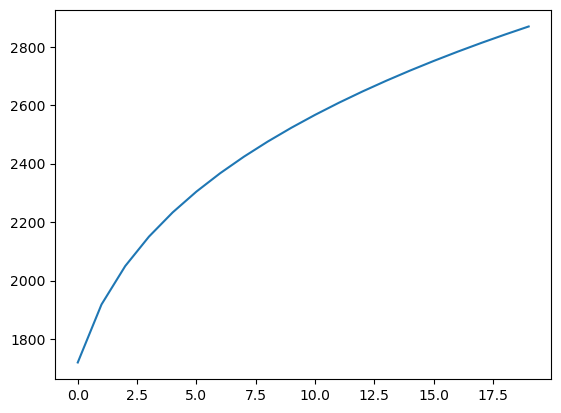

In [149]:
import matplotlib.pyplot as plt

plt.plot(range(20), plotdata)

In [151]:
exp = pd.DataFrame({'x':range(20), 'y':plotdata})
exp.to_csv('exp.csv')

In [177]:
with open('lolMatch.json', encoding="utf-8") as f:
    data = json.load(f)

participants = get_field_values(data[2], 'participants')
player = participants[1][0]
pid = get_field_values(player, 'puuid')[0]
playerstats = pd.DataFrame(player)
playerstats.to_csv('playerdata.csv')
playerstats.drop('styles', inplace = True)
playerstats.drop('perks', axis = 1, inplace = True)
playerstats

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,...,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
statPerks,6,0,0,16769,17,54,Malphite,0,4,532,...,2787,0,0,8,0,37,3,4,14,False


In [ ]:
for i in range(1, 5):
    participants = get_field_values(data[i], 'participants')
    if len(participants[0]) != 10:
        continue
    
    for player in participants[1]:
        pid = get_field_values(player, 'puuid')[0]
        playerstats = pd.DataFrame(player)
        playerstats.head()
        
    player = participants[1][0]
    pid = get_field_values(player, 'puuid')[0]
    playerstats = pd.DataFrame(player)
    playerstats.head()